# Processing Observational Cluster Magnitudes

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [17]:
# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 100
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': True,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

In [2]:
def lin_func(x, m, c):
    return m*x + c 

## Magnitude Calibration Parameters



In [5]:
mag_params = pd.read_csv('magnitude_cal.csv')
mag_params

,target,slope,constant,slope_err,constant_err
0,Bochum2_B,0.977407,24.556116,0.002836,0.026838
1,Bochum2_V,1.028768,25.008001,0.005107,0.053416


## Bochum 2 

In [11]:
raw_mags = pd.read_csv('raw_cluster_mags/bochum2.csv')

raw_B = raw_mags['Bmag']
raw_V = raw_mags['Vmag']

cal_B = lin_func(raw_B, mag_params['slope'][0], mag_params['constant'][0])
cal_V = lin_func(raw_V, mag_params['slope'][1], mag_params['constant'][1])

In [26]:
V_e, BV_e = np.loadtxt('bochum2_WEBDA.txt', unpack = True, usecols=(2, 3), skiprows = 1 )

/var/folders/9k/zxw1zx552m142q6419p6yn7c0000gn/T/ipykernel_95345/321726500.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.scatter(bv, cal_V, s = 10, label = 'Obs.')


Text(0.5, 0, 'BV')

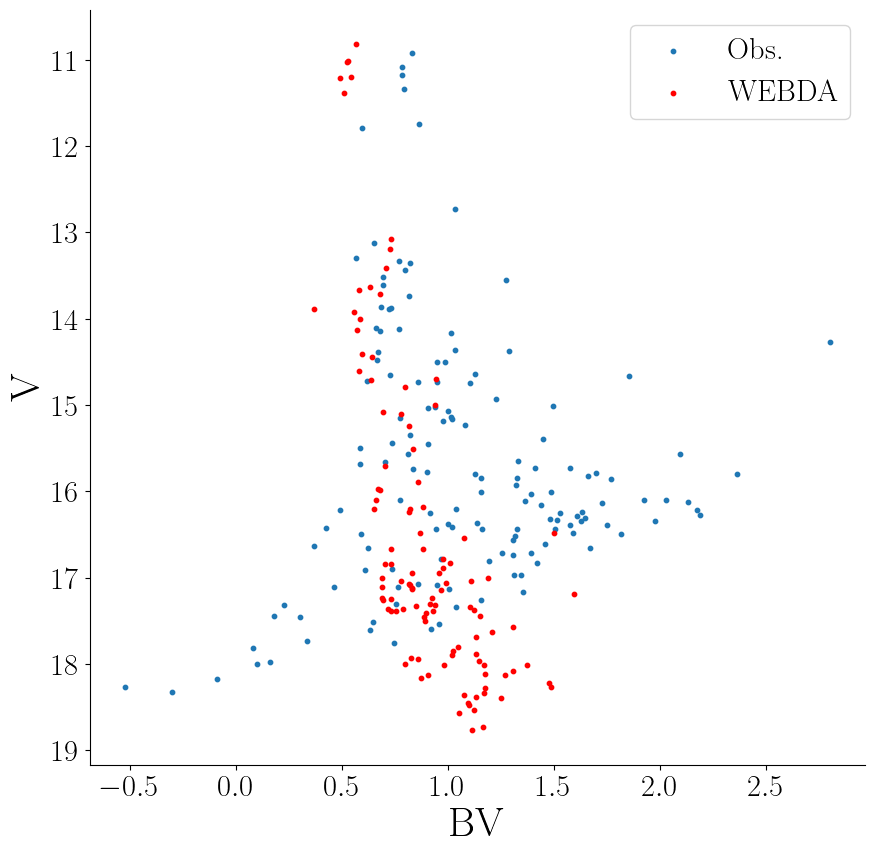

In [29]:
bv = cal_B - cal_V

plt.scatter(bv, cal_V, s = 10, label = 'Obs.')
plt.scatter(BV_e, V_e, label = 'WEBDA', color = 'red', s = 10)
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.ylabel('V')
plt.xlabel('BV')